# Cleaning and Augmentation
This notebook is meant to read in the data downloaded from reddit and prepare it for analysis by cleaning it and doing some computation.

## Setup

In [13]:
import pandas as pd
import datetime
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
# Change this to analyze something else
subreddit = "The_B_Emoji"
download_date_string = "19.12.04-09:28:30"

In [15]:
# Constants
data_directory = "downloads/"
submissions_suffix = "-submissions-" + download_date_string + ".csv"
comments_suffix = "-comments-" + download_date_string + ".csv"

## Read the Data

In [16]:
# Read the submissions
submissions_file = data_directory + subreddit + submissions_suffix
submissions = pd.read_csv(submissions_file, index_col=0)
submissions.head()

,submission_id,user,utc,score,title,body,subreddit
0,e2yzip,greendirtbike,1.574953e+09,25,Yall 🅱️etter 🅱️e supporting local 🅱️usiness th...,They need to make a living just as much as the...,The_B_Emoji
1,e2nsue,ConnerFromCyberLife,1.574893e+09,36,🅱️he 🅱️ood 🅱️hit,NaN,The_B_Emoji
2,e0me00,Colteor,1.574536e+09,28,With 🅱️ you say?,NaN,The_B_Emoji
3,e07yk0,ConnerFromCyberLife,1.574459e+09,46,🅱️on’t 🅱️et 🅱️his 🅱️u🅱️reddit 🅱️ie,NaN,The_B_Emoji
4,dykruw,Colteor,1.574172e+09,28,🅱️,NaN,The_B_Emoji


In [17]:
# Read the comments
comments_file = data_directory + subreddit + comments_suffix
comments = pd.read_csv(comments_file, index_col=0)
comments.head()

,comment_id,submission_id,user,utc,score,body
0,f8yxtay,t3_e2yzip,skelly46,1.574954e+09,6,🅱️ye 🅱️ye 🅱️ig 🅱️usiness
1,f90phhs,t3_e2yzip,the_thou_factor,1.574976e+09,1,Jeff 🅱️ezos can suck my 🅱️ig cock. With the ne...
2,f90pgac,t3_e2yzip,Lapis-Blaze-Yt,1.574976e+09,0,I 🅱️re♿️er 🅱️🅾️mmunism
3,f8wlkrh,t3_e2nsue,Bored_Ford,1.574894e+09,5,"Oh 🅱️a🅱️y, that's 🅱️ank"
4,f8wlzva,t3_e2nsue,IPorK,1.574894e+09,4,Oh s🅱️it that's 🅱️eep


## Data Cleaning

In [18]:
# Remove the t3_ prefix from comment submission ids
comments["submission_id"] = comments["submission_id"].apply(lambda s: s.split("t3_")[1])

## Data Conversion

In [19]:
# Convert utc to date
submissions['date'] = submissions['utc'].apply(datetime.datetime.utcfromtimestamp)
comments['date'] = comments['utc'].apply(datetime.datetime.utcfromtimestamp)
#submissions.head()
#comments.head()

## Pagerank
This uses [networkx](https://networkx.github.io/documentation/networkx-1.10/index.html)

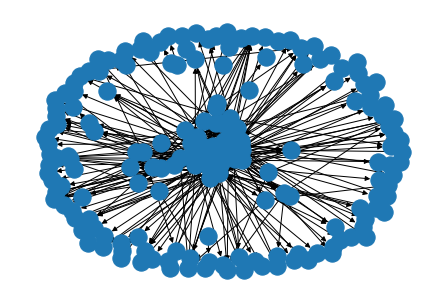

In [20]:
# Start by creating a directed graph
g = nx.DiGraph()

# Each user is a node in the graph
g.add_nodes_from(set(submissions['user'].append(comments['user'])))

# Each comment is a directed edge
pd.merge(submissions, comments, on='submission_id') \
    .apply(lambda row: g.add_edge(row["user_x"], row["user_y"]), axis=1)

# Visualize the graph
nx.draw(g)
plt.show()

In [21]:
# Now lets calculate pagerank
pagerank = nx.pagerank(g)
#pagerank # uncomment to preview

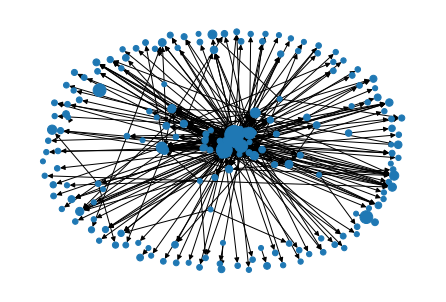

In [24]:
# and visualize it - 8000 is just a scaling factor to make the dots visible
nx.draw(g, node_size=[8000 * x for x in pagerank.values()])
plt.show()